In [2]:
import pandas as pd

df = pd.read_csv("data/sapphire_500C.uxd", skiprows = 90, sep = r"\s+", names = ["2Theta", "Counts"])
df

,2Theta,Counts
0,13.6823,32
1,13.6873,32
2,13.6923,47
3,13.6973,28
4,13.7023,33
...,...,...
10796,67.6623,12
10797,67.6673,6
10798,67.6723,12
10799,67.6773,6


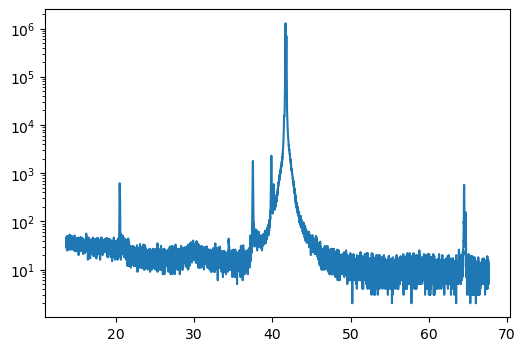

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 4))

ax.plot(df["2Theta"], df["Counts"])

ax.set_yscale("log")

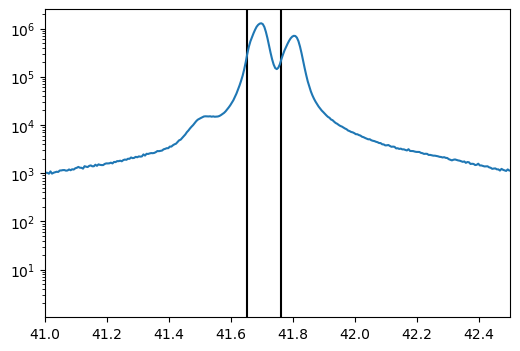

In [4]:
import numpy as np

# for copper:
ka1 = 1.54059
ka2 = 1.54443
kb = 1.39223

# bragg's law
def theta(n, l, d):
    return np.arcsin(n * l / (2 * d)) / np.pi * 180

# for sapphire:
# https://www.shalomeo.com/Al2O3-Sapphire.html
c = 13.00 # angstrom
def d_hkl(h, k, l):
    return c / np.sqrt(h**2 + k**2 + l**2)

# calculate 2theta for a given h, k, l
def ttheta_hkl(h, k, l, kk=ka1):
    return 2*theta(1, kk, d_hkl(h, k, l))

sapphire_peaks = [ttheta_hkl(0, 0, 6, ka1), ttheta_hkl(0, 0, 6, ka2)]

for sapphire_peak in sapphire_peaks:
    ax.axvline(sapphire_peak, color = "black", zorder = -1)

ax.set_xlim(41, 42.5)

fig

In [5]:
from utils import sum_peaks
from scipy.optimize import curve_fit

# crop the data 
sapphire_data = df[(df['2Theta'] > 41) & (df['2Theta'] < 42.5)]

# initial guess
p0 = [41.7, 5e5, 1e-2, 0, 41.8, 3.5e5, 1e-2, 0, 1e3]

# these parameters are defined in utils.py
# basically each peak has a position, amplitude, sigma and eta (mix between gaussian and lorenztian), and then there is a fixed background

popt, pcov = curve_fit(sum_peaks, sapphire_data['2Theta'], sapphire_data['Counts'], p0 = p0)
err = np.sqrt(np.diag(pcov))

params = ["pos 1", "amp 1", "sigma 1", "eta 1",
          "pos 2", "amp 2", "sigma 2", "eta 2",
          "background"]
for i in range(len(popt)):
    print(f"{params[i]}: {round(popt[i], 5)} +- {round(err[i], 5)}")

pos 1: 41.69258 +- 0.00013
amp 1: 79541.68231 +- 993.84974
sigma 1: 0.02118 +- 0.00017
eta 1: 0.42424 +- 0.03229
pos 2: 41.80059 +- 0.00024
amp 2: 38051.58464 +- 1013.3273
sigma 2: 0.02151 +- 0.00028
eta 2: 0.10046 +- 0.07585
background: 1759.50811 +- 984.92317


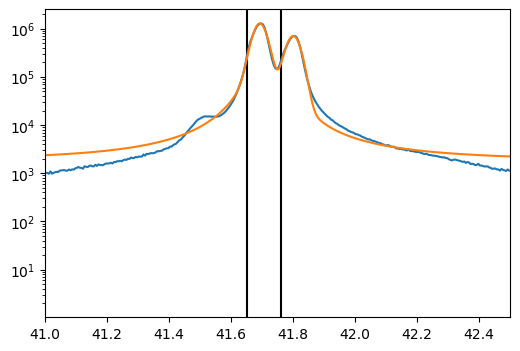

In [6]:
ax.plot(df['2Theta'], sum_peaks(df['2Theta'], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]))

fig

In [17]:
# now we correct the data

deviation = np.mean([popt[0] - ttheta_hkl(0, 0, 6, ka1), popt[4] - ttheta_hkl(0, 0, 6, ka2)])
df["2Theta_corrected"] = df["2Theta"] - deviation

df

,2Theta,Counts,2Theta_corrected
0,13.6823,32,13.640778
1,13.6873,32,13.645778
2,13.6923,47,13.650778
3,13.6973,28,13.655778
4,13.7023,33,13.660778
...,...,...,...
10796,67.6623,12,67.620778
10797,67.6673,6,67.625778
10798,67.6723,12,67.630778
10799,67.6773,6,67.635778


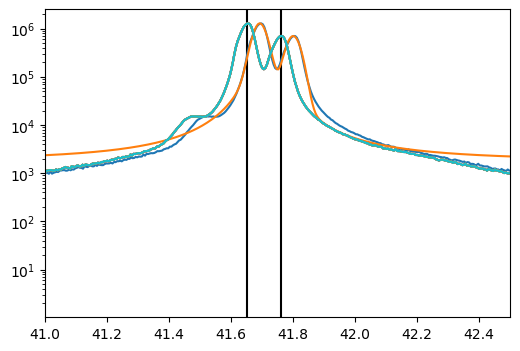

In [15]:
ax.plot(df['2Theta_corrected'], df["Counts"])

fig

Tudo feito!

Próximos passos:

1. Fittar o pico do Ga2O3 (o -603). Só devem conseguir fazer isso para as amostras recozidas a 750 e 1000 C, que têm já mais qualidade. É o mesmo processo, mas selecionam a área em volta desse pico, e usam a função `sum_peak()` do utils, que tem apenas um pico + ruído.
2. Calcular, com esses resultados, a percentagem de alumínio no filme, o grain size e o microstrain
3. Representar os dados e resultados finais :)

É importante que usem sempre para as contas (e para os gráficos) os 2Theta _corrigidos_
Também é boa ideia normalizar as medidas de alguma maneira (ex os picos Ka1 e Ka2)

Estes notebooks são muito giros (e até são para incluir células em markdown e imagens), mas podem induzir-nos em erro se corremos células fora de ordem ou se tiverem resultados antigos em cache.
Portanto, passamos ao `main.py`.

Abaixo, o Óscar:

![Óscar (sapo)](./cute_frog.jpg)